#   MACHINE LEARNING Project



### import data and Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC

In [ ]:
# INSERT DATA and show the data
data=pd.read_csv('data.csv')
data

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


###Make data available for models

In [ ]:
# split data into X and y
X=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2 )

In [ ]:
train_valid_x,test_valid_x,train_valid_y,test_valid_y=train_test_split(train_x,train_y,test_size=0.2 )

# 1) K-Nearest neighbors classifier

***tuning*** ***hyperparameter*** 

In [ ]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(train_valid_x,train_valid_y)
    yhat= knn.predict(test_valid_x)
    mean_acc[i-1] = accuracy_score(test_valid_y, yhat)

mean_acc

array([0.92753623, 0.92028986, 0.94202899, 0.94927536, 0.93478261,
       0.94927536, 0.93478261, 0.92753623, 0.92753623, 0.92753623,
       0.93478261, 0.92753623, 0.92753623, 0.92753623, 0.93478261,
       0.92753623, 0.93478261, 0.92753623, 0.92028986, 0.92753623])

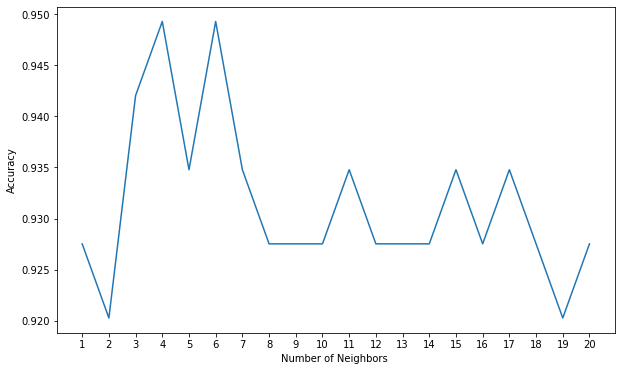

In [ ]:
#Plot the ACC
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Grid parameters
grid_params = { 'n_neighbors' : [4,6],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
#Define Grid search
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
#Fit Gridsearch
g_res = gs.fit(train_valid_x,train_valid_y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
g_res.best_score_  #Best Score 

0.9438405797101449

In [ ]:
g_res.best_params_  #Best Parameters 

{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}

**KNN** (With Parameters After tuning)

In [ ]:
# KNN MODEL
cl=KNeighborsClassifier(n_neighbors = 6, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
cl.fit(train_x,train_y)

KNeighborsClassifier(algorithm='brute', n_neighbors=6, weights='distance')

In [ ]:
scores = cross_val_score(cl ,train_x,train_y , cv = 5)

In [ ]:
scores

array([0.95652174, 0.97101449, 0.92028986, 0.96376812, 0.92028986])

In [ ]:
y_pred1=cl.predict(test_x)

In [ ]:
#print metrics
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
print("Accuracy : ", round(accuracy_score(y_pred1,test_y)*100,2),'%')
print("Recall : ", round(recall_score(y_pred1,test_y)*100,2),'%')
print("Precision : ", round(precision_score(y_pred1,test_y)*100,2),'%')
print("F1 score : ", round(f1_score(y_pred1,test_y)*100,2),'%')


Accuracy :  93.06 %
Recall :  78.95 %
Precision :  65.22 %
F1 score :  71.43 %


Text(0, 0.5, 'TPR')

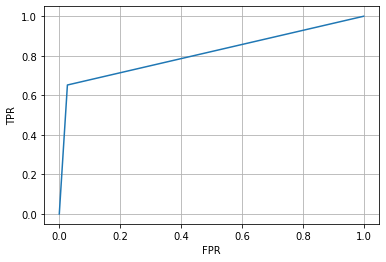

In [ ]:
#plotting
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y,y_pred1)

plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')

Text(0.5, 0, 'Threshold')

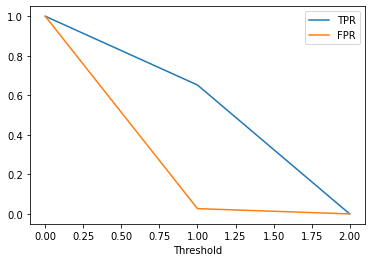

In [ ]:
#plotting
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')


In [ ]:
#area under the curve
auc=metrics.roc_auc_score(test_y,y_pred1)
print("AUC=%f" % auc)

AUC=0.812754


# 2) LR classifier

In [ ]:
#Grid parameters
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [1e-4,.001,.01,.1,.5,1,2,3,4,5,6,7,8,9,10],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
# LogisticRegression model for tuning
model1=LogisticRegression()

In [ ]:
#Define Grid search
clf = GridSearchCV(model1, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
#Fit Gridsearch
best_clf = clf.fit(train_valid_x,train_valid_y)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1620 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [ ]:
#Best Parameters 
best_clf.best_params_

{'C': 3, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
best_clf.best_score_    #Best Score

0.9456521739130435

LOGISTIC REGRESSION AFTER TUNING

In [ ]:
#LOGISTIC REGRESSION AFTER TUNING
model1=LogisticRegression(C=3 ,max_iter=100 , penalty="l2" , solver="newton-cg" )
model1.fit(train_x,train_y)

LogisticRegression(C=3, solver='newton-cg')

In [ ]:
y_pred2=model1.predict(test_x)

In [ ]:
#print metrics
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
print("Accuracy : ", round(accuracy_score(y_pred2,test_y)*100,2),'%')
print("Recall : ", round(recall_score(y_pred2,test_y)*100,2),'%')
print("Precision : ", round(precision_score(y_pred2,test_y)*100,2),'%')
print("F1 score : ", round(f1_score(y_pred2,test_y)*100,2),'%')

Accuracy :  94.22 %
Recall :  100.0 %
Precision :  62.96 %
F1 score :  77.27 %


Text(0, 0.5, 'TPR')

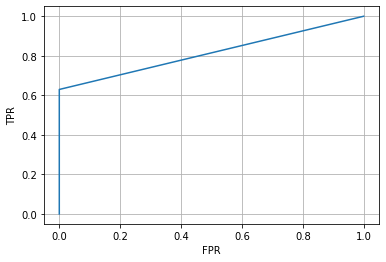

In [ ]:
#plotting
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y,y_pred2)

plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')


Text(0.5, 0, 'Threshold')

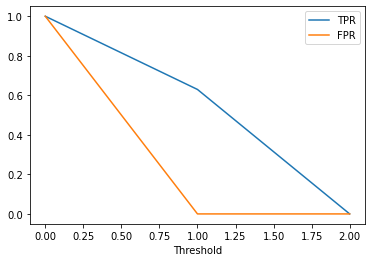

In [ ]:
#plotting
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')


In [ ]:
#area under the curve
auc=metrics.roc_auc_score(test_y,y_pred2)
print("AUC=%f" % auc)

AUC=0.814815


#  3) NB classifier

*NO NEED FOR TUNING*

In [ ]:
# Naïve Bayes classifier  Without tuninng
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(train_x,train_y)

GaussianNB()

In [ ]:
#predict
y_pred3=NB.predict(test_x)

In [ ]:
#print metrics
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
print("Accuracy : ", round(accuracy_score(y_pred3,test_y)*100,2),'%')
print("Recall : ", round(recall_score(y_pred3,test_y)*100,2),'%')
print("Precision : ", round(precision_score(y_pred3,test_y)*100,2),'%')
print("F1 score : ", round(f1_score(y_pred3,test_y)*100,2),'%')

Accuracy :  39.88 %
Recall :  17.6 %
Precision :  95.65 %
F1 score :  29.73 %


Text(0, 0.5, 'TPR')

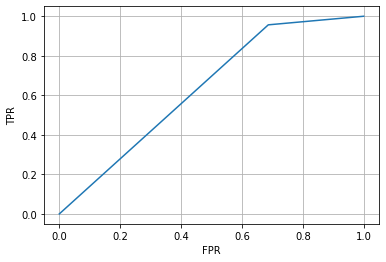

In [ ]:
#plotting
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y,y_pred3)

plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')


Text(0.5, 0, 'Threshold')

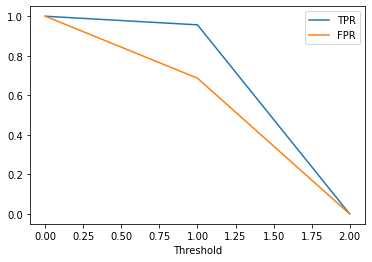

In [ ]:
#plotting
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')

In [ ]:
#area under the curve
auc=metrics.roc_auc_score(test_y,y_pred3)
print("AUC=%f" % auc)

AUC=0.634928


# 4) DT classifier

In [ ]:
#Grid parameters for tuning
param_grid = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'max_depth': [1,2,3,4,5,6,7,8,9, 10, 25, 40, 50],
             'min_samples_split': [1,2,3,4,5,6,7,8,9, 10, 25, 50, 50],
             'min_samples_leaf': [1,3,4,5,6,7,8,9, 10, 25, 50, 50],
             'max_features': ['auto', 'log2', None,'sqrt']
}

In [ ]:
# DecisionTreeClassifier MODEL
model4=DecisionTreeClassifier()

In [ ]:
#Define Grid search
clf = GridSearchCV(model4, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)

In [ ]:
#Fit Gridsearch
g_res = clf.fit(train_valid_x,train_valid_y)

Fitting 4 folds for each of 32448 candidates, totalling 129792 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9984 fits failed out of a total of 129792.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9984 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a

In [ ]:
#Best Parameters 
g_res.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

Decision tree (After Tuning parameters)

In [ ]:
# Decision tree
model4=DecisionTreeClassifier(criterion="gini" ,max_depth= 8 , max_features=None , min_samples_split=2,min_samples_leaf= 1,splitter= 'best')
model4.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=8)

In [ ]:
#prediction
y_pred4=model4.predict(test_x)

In [ ]:
#print metrics
print("Accuracy : ", round(accuracy_score(y_pred4,test_y)*100,2),'%')
print("Recall : ", round(recall_score(y_pred4,test_y)*100,2),'%')
print("Precision : ", round(precision_score(y_pred4,test_y)*100,2),'%')
print("F1 score : ", round(f1_score(y_pred4,test_y)*100,2),'%')

Accuracy :  97.69 %
Recall :  95.24 %
Precision :  86.96 %
F1 score :  90.91 %


Text(0, 0.5, 'TPR')

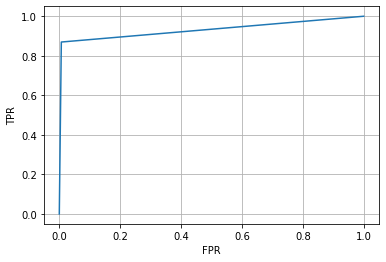

In [ ]:
#plotting
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y,y_pred4)

plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')


Text(0.5, 0, 'Threshold')

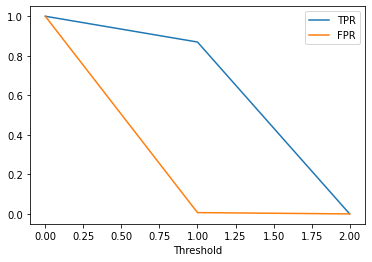

In [ ]:
#plotting
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')


In [ ]:
#area under the curve
auc=metrics.roc_auc_score(test_y,y_pred4)
print("AUC=%f" % auc)

AUC=0.931449


# 5) SVM classifier

In [ ]:
# defining parameter range
model5=SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear', 'poly','sigmoid'],
              'degree': [1,2,3],
              }
 
grid = GridSearchCV(model5, param_grid, cv = 2, refit = True, verbose = 3)
 



In [ ]:
#Fit Gridsearch
g_res = grid.fit(train_valid_x,train_valid_y)

Fitting 2 folds for each of 300 candidates, totalling 600 fits
[CV 1/2] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/2] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/2] END C=0.1, degree=1, gamma=1, kernel=linear;, score=0.946 total time=   0.0s
[CV 2/2] END C=0.1, degree=1, gamma=1, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/2] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.946 total time=   0.0s
[CV 2/2] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.909 total time=   0.0s
[CV 1/2] END C=0.1, degree=1, gamma=1, kernel=sigmoid;, score=0.877 total time=   0.0s
[CV 2/2] END C=0.1, degree=1, gamma=1, kernel=sigmoid;, score=0.873 total time=   0.0s
[CV 1/2] END C=0.1, degree=1, gamma=0.1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/2] END C=0.1, degree=1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/2] END C=0.1, degree=1, gamma=0.1, kernel=linear;, score=0.946 total time=   0.0s

In [ ]:
#Best Parameters 
g_res.best_params_

{'C': 1000, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

*SVC (after tuning the parameters)*

In [ ]:
# SVC MODEL
model5=SVC(C=  1000, degree= 1, gamma =  0.0001, kernel = 'rbf')
model5.fit(train_x,train_y)
y_pred5=model5.predict(test_x)

In [ ]:
#print metrics
print("Accuracy : ", round(accuracy_score(y_pred5,test_y)*100,2),'%')
print("Recall : ", round(recall_score(y_pred5,test_y)*100,2),'%')
print("Precision : ", round(precision_score(y_pred5,test_y)*100,2),'%')
print("F1 score : ", round(f1_score(y_pred5,test_y)*100,2),'%')

Accuracy :  95.95 %
Recall :  86.36 %
Precision :  82.61 %
F1 score :  84.44 %


Text(0, 0.5, 'TPR')

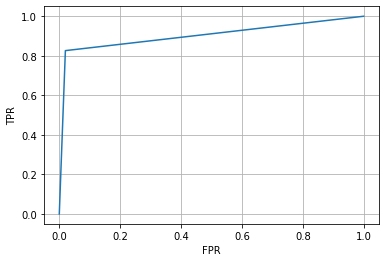

In [ ]:
#plotting
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y,y_pred5)

plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')


Text(0.5, 0, 'Threshold')

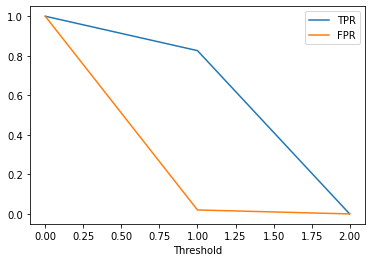

In [ ]:
#plotting
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')


In [ ]:
#area under the curve
auc=metrics.roc_auc_score(test_y,y_pred5)
print("AUC=%f" % auc)

AUC=0.903043


# THE best classifier to this data is : 
## ((****Decision Trees classifier****))